This notebook performs a grid search over key parameters in both models and plots how pattern wavelength and amplitude vary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model
import utils
from scipy.signal import find_peaks

In [2]:
def estimate_wavelength(signal, x):
    peaks, _ = find_peaks(signal)
    if len(peaks) > 1:
        dx = x[1] - x[0]
        return np.mean(np.diff(peaks)) * dx
    else:
        return np.nan

In [3]:
# Domain for buckling (1D)
x = np.linspace(0, 1, 200)
E = 1.0
nu = 0.3
t_c = np.ones_like(x) * 0.1
P = 10.0
q = 1.0

# Domain for Turing (2D)
N = 200
domain = np.linspace(0, 1, N)
dx = domain[1] - domain[0]
u0 = np.random.rand(N, N) * 0.1 + 0.5
v0 = np.random.rand(N, N) * 0.1
Du, Dv = 0.16, 0.08

In [5]:
def f(u, v):
    return u - u**3 - v

def g(u, v):
    return u - v

In [7]:
steps = 500
enumerate_P = np.linspace(5, 20, 10)
wavelengths_buck = []
amplitudes_buck = []
for P in enumerate_P:
    w = model.sim_buckling(E=1.0, nu=0.3, t_c=t_c, P=P, q=1.0, x_domain=x)
    wavelengths_buck.append(estimate_wavelength(w, x))
    amplitudes_buck.append(np.max(w) - np.min(w))

# Turing: vary Du
enumerate_Du = np.linspace(0.05, 0.3, 10)
wavelengths_tur = []
amplitudes_tur = []
for Du in enumerate_Du:
    u, _ = model.sim_turing(Du=Du, Dv=0.08, f_func=f, g_func=g, u0=u0, v0=v0, dx=dx, dt=1e-2, steps=steps)
    # take central row
    row = u[N//2]
    wavelengths_tur.append(estimate_wavelength(row, domain))
    amplitudes_tur.append(np.max(row) - np.min(row))

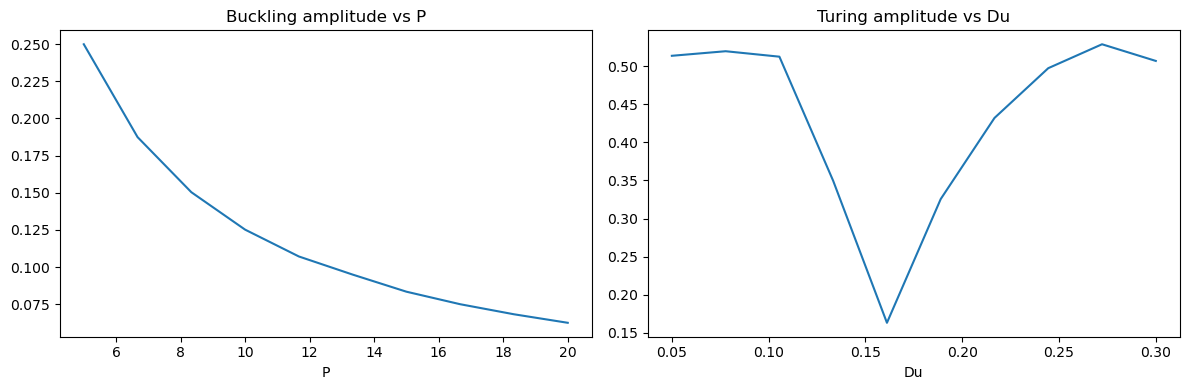

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# # Buckling
# axs[0,0].plot(enumerate_P, wavelengths_buck)
# axs[0,0].set_title('Buckling wavelength vs P')
# axs[0,0].set_xlabel('P')

axs[0].plot(enumerate_P, amplitudes_buck)
axs[0].set_title('Buckling amplitude vs P')
axs[0].set_xlabel('P')

# # Turing
# axs[0,1].plot(enumerate_Du, wavelengths_tur)
# axs[0,1].set_title('Turing wavelength vs Du')
# axs[0,1].set_xlabel('Du')

axs[1].plot(enumerate_Du, amplitudes_tur)
axs[1].set_title('Turing amplitude vs Du')
axs[1].set_xlabel('Du')

plt.tight_layout()
plt.show()